<h1>List of questions to be answered</h1>
<p>First, some basic questions:
    <ol>
        <li>Who were the passengers on the Titanic? (Ages, Gender, Class, etc.)</li>
        <li>What deck were passengers on and how does that relate to their class?</li>
        <li>Where did the passengers come from?</li>
        <li>Who was alone and who was with family?</li>
    </ol>
</p>
<p>Then we'll dig deeper with a broader question:
    <ol start="5">
        <li>What factors helped a person survive the sinking?</li>
    </ol>
</p>


In [3]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
titanic_df = pd.read_csv('train.csv',sep=',')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns
%matplotlib inline

<h1>Who were the passengers on the Titanic?</h1>

<h2>What is the gender distribution of the passengers?</h2>

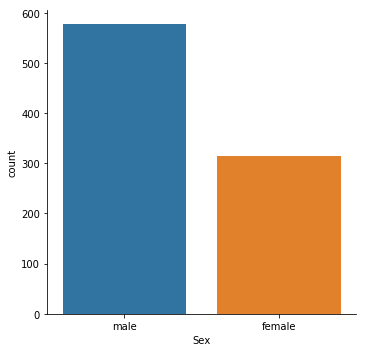

In [8]:
sns.catplot(x='Sex',data=titanic_df,kind='count')

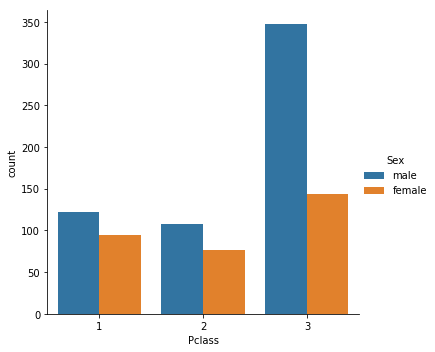

In [9]:
#Plot passenger class with gender as a hue
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')

<p> It appears that the gender distributions are relatively equal in first and second class. However, there is a huge disparity in third class.</p>

<h2>How many children were on the Titanic?</h2>
<p>To answer this question, a child is definied as a person aged 12 or under. Age is an obvious indicator, but this column has almost 200 missing records. There are other clues in the dataset: 
    
    <ul>
        <li>The title "Master" in a name indicates a young boy.</li>
        <li>The title "Mr." indicates a teen or man who is likely over 12 years old.</li>
        <li>The title "Mrs." indicates a married woman - again likely over 12 years old.</li>
        <li>The column <code>SibSp</code> is the number of siblings and spouses. The column <code>Parch</code> is the number of parents and children. If both of these are zero, then the person is traveling alone and likely is an adult.</li>
    </ul>        
    
These indicators can be used to create a new column to indicate whether the person is a man, woman, or child.
</p> 

In [10]:
# Create a new column in the DataFrame called Person
def male_female_child(passenger):
    name,age,sex,sibsp,parch = passenger
    
    if age < 13 or 'Master.' in name: 
         # Names with "Master." indicate a young boy
        return 'child'
    elif not np.isnan(age) or 'Mrs.' in name or 'Mr.' in name or (sibsp == 0 and parch == 0):
        # Names with "Mrs." indicate a married woman
        # Names with "Mr." indicate a teen or man
        # If SibSp and Parch = 0, the person is alone and likely an adult.
        return sex
    else: 
        return np.nan

titanic_df['Person']=titanic_df[['Name','Age','Sex','SibSp','Parch']].apply(male_female_child,axis=1)

In [11]:
titanic_df['Person'].value_counts()

male      536
female    268
child      73
Name: Person, dtype: int64

<p>Here are the number of passengers who remain unclassified:</p>

In [12]:
len(titanic_df[titanic_df['Person'].isna()])

14

<p>This number is about 2% of the male population and about 4% of the female population. Failing to classify passengers will not significantly bias results from these populations. However, this number is 20% of the child population. Any conclusions we make about children on the Titanic could be biased by the fact that some passengers were not classified.</p>


<p>Let's examine the potential family members of these unclassified passengers by listing all passengers who share the same last name. This may provide insight into whether they are children or adults.</p> 

In [13]:
# Create a list containing just the last name of each person still not classified. 
nc_tickets = titanic_df.loc[titanic_df['Person'].isnull(),'Name'].tolist()
nc_tickets = list(set(i.split(' ')[0] for i in nc_tickets)) # Using list and set drops duplicates


# List all of the passengers who share the same last name as an unclassified passenger.
titanic_df[titanic_df['Name'].str.contains('|'.join(nc_tickets))].sort_values('Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,NaN
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q,male
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,male
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,child
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,NaN
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,NaN
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,NaN
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q,NaN


<h3>What is the distribution of children among the different passenger classes?</h3>

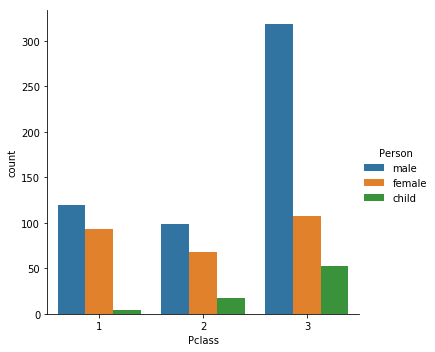

In [14]:
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Person')

<p>The vast majority of children were in third class. Almost all of the minority were in second class. Any predictions about child survival rates will likely be counfounded by survival rates for 3rd class passengers.</p>

<h2>What is the age distribution of the passengers?</h2>

<p>Descriptive statistics and a histogram of ages for all passengers:</p>

Age mean and standard deviation: 29.7 +/- 14.5


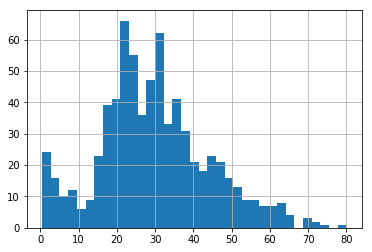

In [15]:
print(f'Age mean and standard deviation: {titanic_df["Age"].mean():.1f} +/- { titanic_df["Age"].std():.1f}')

titanic_df['Age'].hist(bins=35)

<p>Descriptive statistics and histogram of age for each passenger class:</p>

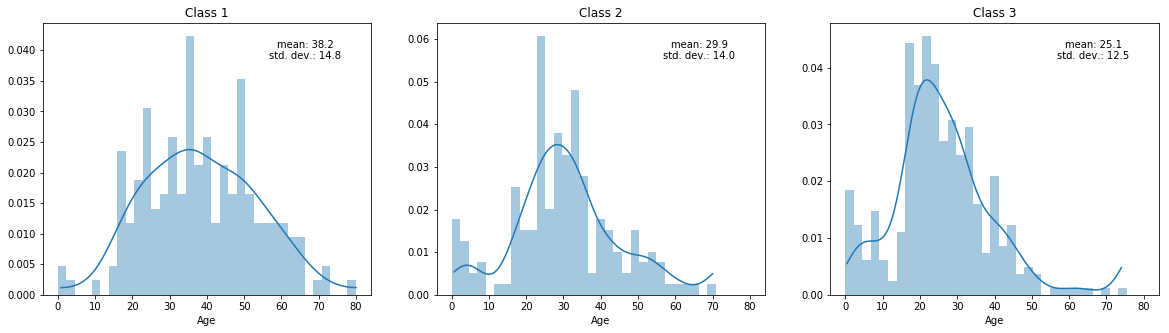

In [16]:
fig, axes = plt.subplots(1,3,figsize = (20,5))

for pc in np.arange(1,4):
    #Select all passengers in that class:
    pcSeries = titanic_df.loc[titanic_df['Pclass'] == pc,'Age']
    
    #Create text for the descriptive statistics
    stext ='mean: {0:.1f}\nstd. dev.: {1:.1f}'.format(pcSeries.mean(),pcSeries.std())
    
    #plot the histogram 
    sns.distplot(pcSeries.dropna(),bins=35,ax=axes[pc-1],hist_kws={'range':[0,80]},kde_kws={'cut':0}).set_title('Class '+str(pc))
    plt.text(0.8, 0.9, stext, horizontalalignment='center', verticalalignment='center', transform=axes[pc-1].transAxes)

<p>Descriptive statistics and histogram of age for each gender:</p>

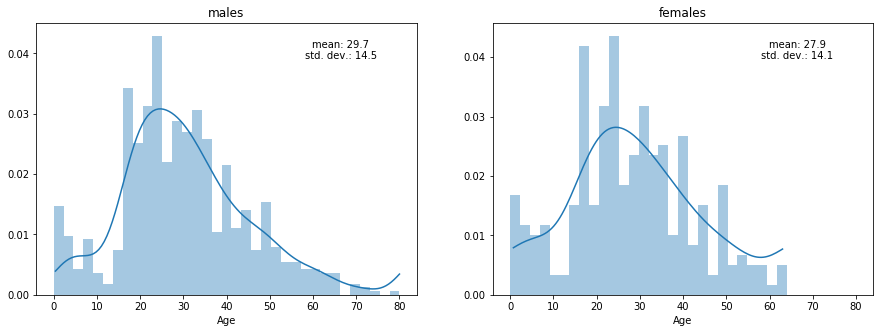

In [17]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

for idx, g in enumerate(['male','female']):
    #Select all passengers in that class:
    gSeries = titanic_df.loc[titanic_df['Sex'].str.contains(g, case=False),'Age']

    #Create text for descriptive statistics
    stext ='mean: {0:.1f}\nstd. dev.: {1:.1f}'.format(gSeries.mean(),gSeries.std()) # ' std. dev.: for {pc} class: {pcSeries.mean():.1f} +/- {pcSeries.std():.1f}')
    
    #plot the histogram 
    sns.distplot(gSeries.dropna(),bins=35, ax=axes[idx],hist_kws={'range':[0,80]},kde_kws={'cut':0}).set_title(g +'s')
    plt.text(0.8, 0.9, stext , horizontalalignment='center', verticalalignment='center', transform=axes[idx].transAxes)

<p>Age distribution of passengers in each class. Each class is split into male, female, and child.</p>

Text(0.5,0,'Passenger Class')

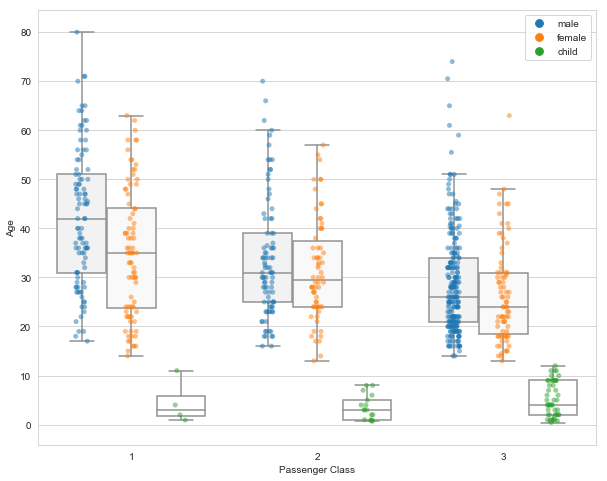

In [18]:
# What is the distribution of each passenger class and person group?
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=[10.0,8.0])
sns.boxplot(x='Pclass',y='Age',hue='Person',data=titanic_df,color='white',ax=ax,showfliers=False)
sns.stripplot(x='Pclass',y='Age',hue='Person',data=titanic_df,alpha=0.5,dodge=True,ax=ax)

# both legends are plotted by default, but we only need the last set
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles[3:],labels[3:]) 
ax.set_xlabel('Passenger Class')

Text(0.5,1,'Third Class')

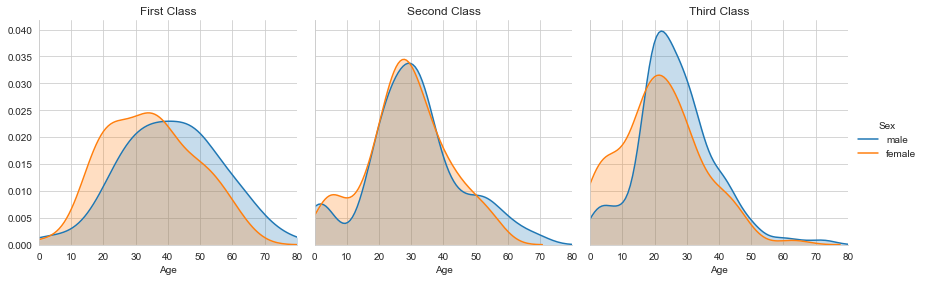

In [19]:
# Create a series of kernel density plots for each passenger class.
fig=sns.FacetGrid(titanic_df,col='Pclass',hue='Sex',height=4)
fig.map(sns.kdeplot,'Age',shade=True)

# Adjust the x-axis range from 0 to the oldest passenger on board.
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

# Add a legend
fig.add_legend()

# Add a title to each grid
axes = fig.axes.flatten()
axes[0].set_title('First Class')
axes[1].set_title('Second Class')
axes[2].set_title('Third Class')

<p>How were people distributed on the various levels of the ship?</p>

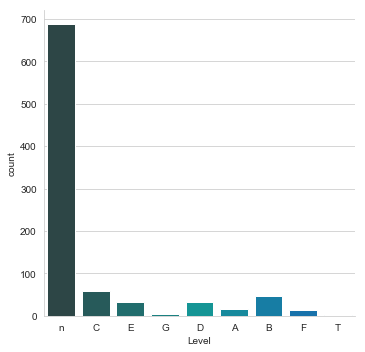

In [20]:
# The level of the cabin is the first letter in the cabin number. Create a new column called Level containing only the level.
titanic_df['Level'] = titanic_df['Cabin'].astype(str).str[0]
sns.catplot('Level',data=titanic_df,palette='winter_d',kind='count')

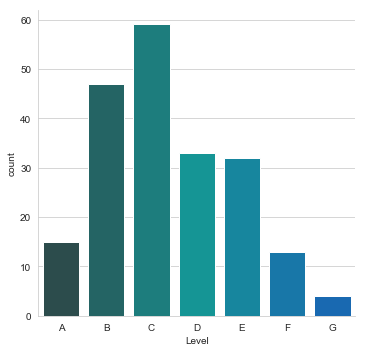

In [21]:
#The levels n and T do not exist, so set these to NaN
titanic_df.loc[titanic_df['Level'].isin(['n','T']),'Level']=np.nan

sns.catplot('Level',data=titanic_df,palette='winter_d',kind='count',order=list('ABCDEFG'))

<p>Here is a histogram of levels split into passenger class.</p>

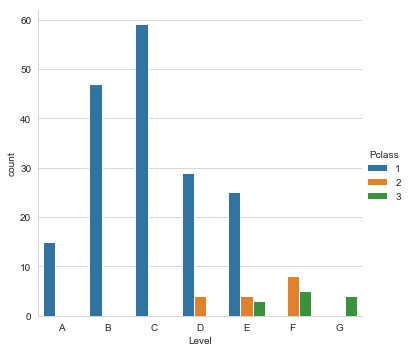

In [22]:
sns.catplot('Level',data=titanic_df,hue='Pclass',kind='count',order=list('ABCDEFG'))

<p>Most of the passengers with a listed cabin number are first class passengers. There is also a pronounced (and expected) correlation between cabin level and passenger class.</p>

<p>Here is a histogram of decks split into men, women, and children.</p>

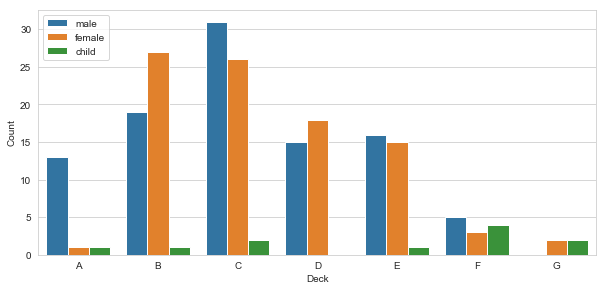

In [23]:
fig, ax = plt.subplots(figsize=[10.0,4.5])
sns.countplot(x='Level',hue='Person',
            data=titanic_df,ax=ax,
            order=['A','B','C','D','E','F','G'])
ax.set_xlabel('Deck')
ax.set_ylabel('Count')
ax.legend(title='')

<p>

<h1>Where did passengers embark on the Titanic?</h1>

In [24]:
#change the DataFrame so it shows the "Embarked" column shows the full name of the city
titanic_df.replace(to_replace={'Embarked':{'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}},inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male,NaN


Text(0,0.5,'Number of Passengers')

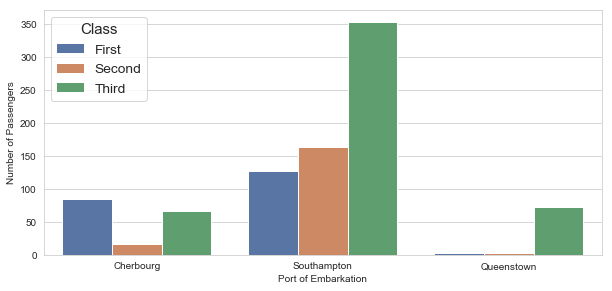

In [25]:
#Plot the data
fig, ax = plt.subplots(figsize=[10.0,4.5])
sns.set(font_scale=1.25,style='whitegrid')
sns.countplot(x='Embarked',data=titanic_df,hue='Pclass',
                   order=['Cherbourg','Southampton','Queenstown'],ax=ax)
plt.legend(title='Class',loc='upper left',labels=['First','Second','Third'])
ax.set_xlabel('Port of Embarkation')
ax.set_ylabel('Number of Passengers')

<h2> Who was alone and who was with a family?</h2>



In [26]:
# Define a new column called 'Alone'
titanic_df['Alone'] = titanic_df['SibSp']+titanic_df['Parch']

#If SibSp + Parch > 0, then the person is with family
titanic_df.loc[titanic_df['Alone'] > 0,'Alone'] = 'With Family'
titanic_df.loc[titanic_df['Alone'] == 0,'Alone'] = 'Alone'
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Level,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male,NaN,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,NaN,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female,C,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male,NaN,Alone


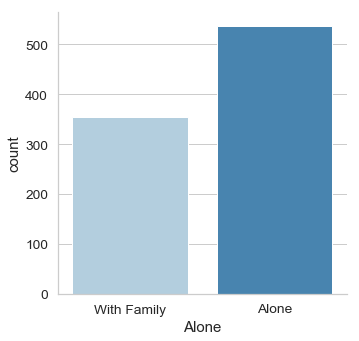

In [27]:
sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count')

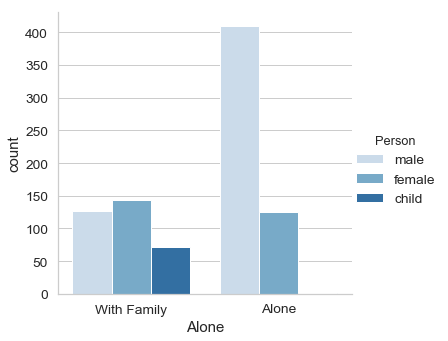

In [28]:
sns.catplot(x='Alone',data=titanic_df,palette='Blues',kind='count',hue='Person')

<h1>What factors contributed to survival?</h1>
<h2>Who survived the disaster?</h2>

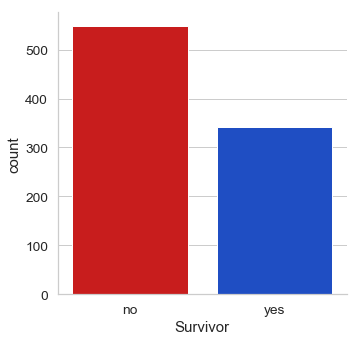

In [29]:
#Let's look at the numbers of survivors.
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})
sns.catplot(x='Survivor',data=titanic_df,kind='count',palette=sns.xkcd_palette(['red','blue']))

<h2>Did the type of person (male, female, child) play a factor in survival?</h2>

[Text(0,0,'Male'), Text(0,0,'Female'), Text(0,0,'Child')]

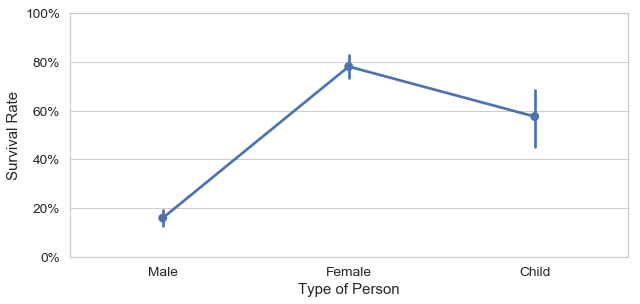

In [30]:
fig, ax = plt.subplots(figsize=[10.0,4.5])
plt.ylim(0,1)
ax.yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
sns.pointplot(x='Person',y='Survived',data=titanic_df,ax=ax)
ax.set_xlabel('Type of Person')
ax.set_ylabel('Survival Rate')
ax.set_xticklabels(['Male','Female','Child'])

<h2>Did passenger class play a factor in survival?</h2>

[Text(0,0,'First'), Text(0,0,'Second'), Text(0,0,'Third')]

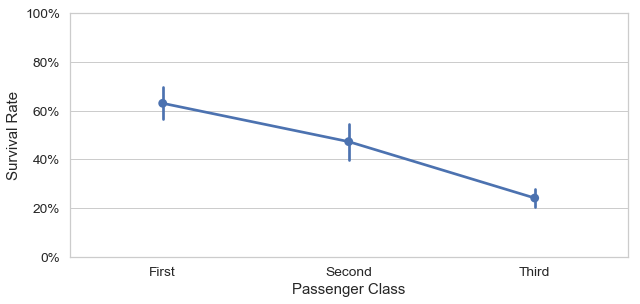

In [31]:

fig, ax = plt.subplots(figsize=[10.0,4.5])
plt.ylim(0,1)
ax.yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
sns.pointplot(x='Pclass',y='Survived',data=titanic_df,ax=ax)
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate')
ax.set_xticklabels(['First','Second','Third'])

<p>Overall, passengers in first class have a statistically significant edge in survival rate over second class and third class.</p>


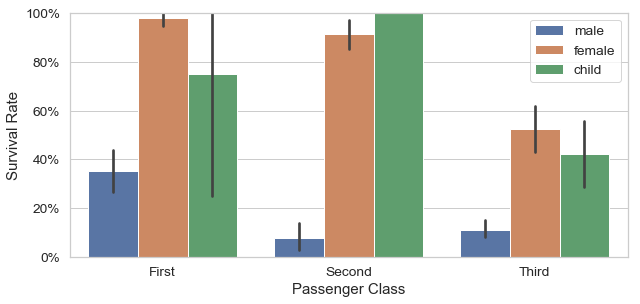

In [32]:
fig, ax = plt.subplots(figsize=[10.0,4.5])
plt.ylim(0,1)
ax.yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
sns.barplot(x='Pclass',y='Survived',hue='Person',data=titanic_df,ax=ax,ci=95)
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate')
ax.set_xticklabels(['First','Second','Third'])
ax.legend(title='')

<p>The survival rate among men is much less than the rate of women and children in each of the passenger classes. If you were a male adule in first class, you had a much better chance of survival than those in other classes. On the other hand, women and children in third class had a much lower survival rate than their counterparts in first and second class.
    
<p>It should be noted that survival rates among different passenger classes might be confounded with deck levels. According to an earlier histogram, decks D, E, and F are the only decks that contain a mixture of classes. It may pay to look at the passengers on these decks to see how their survival rates changed with class.</p>

<h2>What is the survival rate on each deck?</h2>

Text(0,0.5,'Survival Rate')

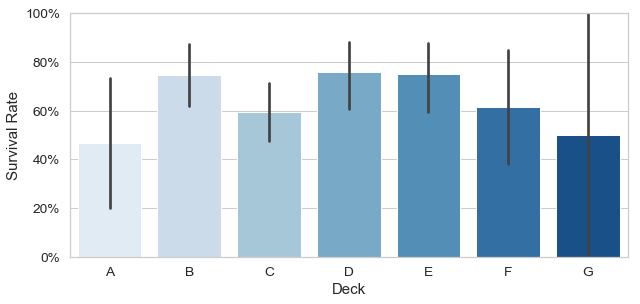

In [33]:
fig, ax = plt.subplots(figsize=[10.0,4.5])
plt.ylim(0,1)
ax.yaxis.set_major_formatter(tck.PercentFormatter(xmax=1))
sns.barplot(x='Level',y='Survived',data=titanic_df,ax=ax,ci=95,
            order=['A','B','C','D','E','F','G'],palette='Blues')
ax.set_xlabel('Deck')
ax.set_ylabel('Survival Rate')

<p>There appears to be no statistically significant difference in survival rates among the different decks of the Titanic. (The vertical lines represent 95% confidence intervals.) We must be mindful, however, that the majority of passengers who have a cabin listing in the database are first class passengers. Cabins F and G contain those very few second and third class passengers who have a cabin listing in the database.</p>

<h2>Is the surivial rate of second and third class passengers with a cabin listing equal to the survival rate of second and third class passengers without a cabin listing?</h2>

<p>First, extract the two data sets from the DataFrame:</p>

In [34]:
without_cabin_df=titanic_df[(titanic_df['Pclass'] != 1) & (titanic_df['Cabin'].isnull())]
with_cabin_df=titanic_df[(titanic_df['Pclass'] != 1) & (titanic_df['Cabin'].notnull())]

In [35]:
#Count those without a cabin who did not survive.
nc_ns = without_cabin_df[(without_cabin_df['Survived']==0)].PassengerId.count()
nc_ns

460

In [36]:
#Count those without a cabin who did survive.
nc_s = without_cabin_df[(without_cabin_df['Survived']==1)].PassengerId.count()
nc_s

187

In [37]:
#Count those with a cabin who did not survive.
c_ns = with_cabin_df[(with_cabin_df['Survived']==0)].PassengerId.count()
c_ns

9

In [38]:
#Count those with a cabin who did survive.
c_s = with_cabin_df[(with_cabin_df['Survived']==1)].PassengerId.count()
c_s

19

In [39]:
# Perform a chi-squared test on the four contingency values
stats.chi2_contingency([[c_s,nc_s],[c_ns,nc_ns]])

(17.413068733383234,
 3.007510256663137e-05,
 1,
 array([[  8.54518519, 197.45481481],
        [ 19.45481481, 449.54518519]]))

<p>The probability that people with cabins have the same survival rate as those without cabins is much less than 5%. Why would second and third class passengers with an assigned cabin number have a significantly greater survival rate than peers who do not have an assigned cabin number? This may be a selection effect. According to <a href='https://www.encyclopedia-titanica.org/cabins.html'>Encyclopedia Titanica</a>, most of the second and third class passengers were matched with cabins primarily through boarding cards found on the person or from verbal accounts. It is more likely for a survivor to have their boarding card than for one to be found on a body. Another contributing factor may be that a boarding pass or ticket may not have been deemed important enough to recover before burial at sea.</p> 

<h2>Did age play a factor in passenger survival rate?</h2>

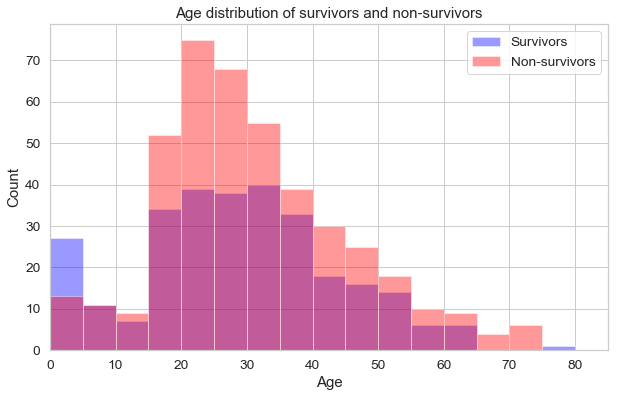

In [40]:
#Create a dataframe containing only non-null ages 
ages_df = titanic_df[titanic_df['Age'].notnull()]
survivors = ages_df.loc[ages_df['Survivor'] == 'yes','Age']
non_survivors = ages_df.loc[ages_df['Survivor'] == 'no','Age']

# Create a histogram for survivors and non-survivors
fig, ax = plt.subplots(figsize=[10.0,6.0])
b = np.arange(0,85,5,dtype=None)
sns.distplot(survivors,ax=ax,kde=False,color='Blue',bins=b,label='Survivors')
sns.distplot(non_survivors,ax=ax,kde=False,color='Red',bins=b,label='Non-survivors')
ax.set_ylabel('Count')
ax.set_title('Age distribution of survivors and non-survivors')
ax.legend(loc='upper right')
plt.xlim(0,85)

# Set the alpha value in the boxes to 0.4
for patch in ax.artists:
    r,g,b,a=patch.get_facecolor()
    patch.set_facecolor((r,g,b,0.4))

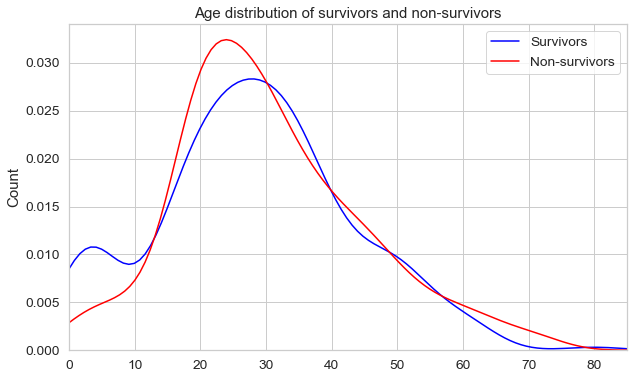

In [41]:
# Create a histogram for survivors
fig, ax = plt.subplots(figsize=[10.0,6.0])
sns.kdeplot(survivors,ax=ax,color='Blue',label='Survivors')
sns.kdeplot(non_survivors,ax=ax,color='Red',label='Non-survivors')
ax.set_ylabel('Count')
ax.set_title('Age distribution of survivors and non-survivors')
ax.legend(loc='upper right')
plt.xlim(0,85)

# Set the alpha value in the boxes to 0.4
for patch in ax.artists:
    r,g,b,a=patch.get_facecolor()
    patch.set_facecolor((r,g,b,0.4))

<p>A Mann-Whitney rank test on the two samples will determine the probability that the two samples are drawn from the same population. This test is chosen over a student's t-test because the distribution of ages are asymmetric for both survivors and non-survivors.</p>

In [42]:
# Perform Mann-Whitney test on the age distribution of survivors and the age distribution of non-survivors.
stats.mannwhitneyu(survivors,non_survivors,alternative='two-sided')


MannwhitneyuResult(statistic=57682.0, pvalue=0.16049252477737763)

<p>The Mann-Whitney U statistic is 57682 and its p value is 0.16. Therefore, the null hypothesis that the mean rank of a survivor's age is equal to the mean rank of a non-survivor's age cannot be rejected. Even though the shape of the distribution implies that non-survivors have a peak at a younger age, it is not quite significant enough a difference to conclude that non-survivors were younger than survivors.</p>

<h2>Did traveling with family play a factor in survival rate?</h2>

Text(0.5,1,'Survival count of passengers alone and with family')

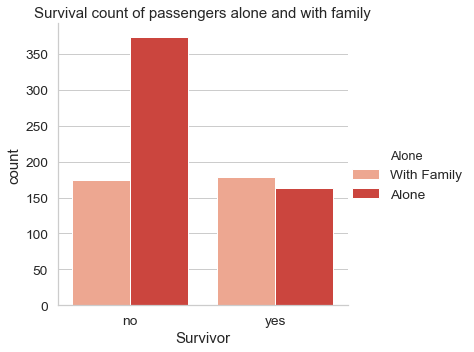

In [66]:
#Let's look at the numbers of survivors.
ax=sns.catplot(x='Survivor',data=titanic_df,kind='count',palette='Reds',hue='Alone')
plt.title('Survival count of passengers alone and with family')

In [58]:
# Count those traveling with family who did not survive.
wf_ns = titanic_df[(titanic_df['Survived']==0) & (titanic_df['Alone'] == 'With Family')].PassengerId.count()
# Count those traveling with family who did survive.
wf_s = titanic_df[(titanic_df['Survived']==1) & (titanic_df['Alone'] == 'With Family')].PassengerId.count()
# Count those traveling alone who did not survive.
a_ns = titanic_df[(titanic_df['Survived']==0) & (titanic_df['Alone'] == 'Alone')].PassengerId.count()
# Count those traveling alone who did survive.
a_s = titanic_df[(titanic_df['Survived']==1) & (titanic_df['Alone'] == 'Alone')].PassengerId.count()

# Display the contingency table: with family and alone are columns, survival and non survival are rows
[[wf_s,a_s],[wf_ns,a_ns]]

[[179, 163], [175, 374]]

In [59]:
# Perform a chi-squared test on the four contingency values
stats.chi2_contingency([[wf_s,a_s],[wf_ns,a_ns]])

(36.00051446773864,
 1.9726543846517183e-09,
 1,
 array([[135.87878788, 206.12121212],
        [218.12121212, 330.87878788]]))

<p>The chi-squared statistic for this contingency table is 36.0. The two-tailed probability that people traveling alone have the same survival rate as those traveling with family is much less than 5% (1.97e-07%). This could be confounded by the fact that most of the people traveling alone are male. The counts of females traveling alone vs. with family are relatively equal. The following analysis will determine if a woman was more likely to survive if she traveled with family vs. traveling alone.</p>

<h3>Did traveling with family have an impact on a female's survival rate?</h3>

Text(0.5,1,'Survival count of females alone and with family')

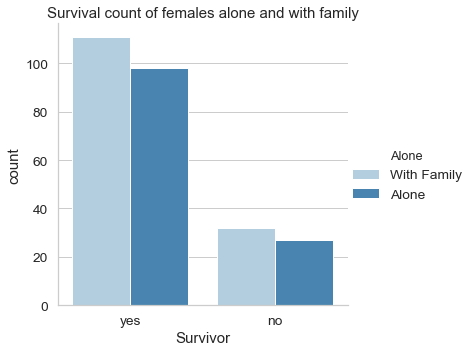

In [65]:
#Let's look at the numbers of survivors.
sns.catplot(x='Survivor',data=titanic_df[titanic_df['Person'] =='female'],kind='count',palette='Blues',hue='Alone')
plt.title('Survival count of females alone and with family')

In [60]:
# Count women traveling with family who did not survive.
fwf_ns = titanic_df[(titanic_df['Survived']==0) & (titanic_df['Alone'] == 'With Family') & (titanic_df['Person'] == 'female')].PassengerId.count()
# Count women traveling with family who did survive.
fwf_s = titanic_df[(titanic_df['Survived']==1) & (titanic_df['Alone'] == 'With Family') & (titanic_df['Person'] == 'female')].PassengerId.count()
# Count women traveling alone who did not survive.
fa_ns = titanic_df[(titanic_df['Survived']==0) & (titanic_df['Alone'] == 'Alone') & (titanic_df['Person'] == 'female')].PassengerId.count()
# Count women traveling alone who did survive.
fa_s = titanic_df[(titanic_df['Survived']==1) & (titanic_df['Alone'] == 'Alone') & (titanic_df['Person'] == 'female')].PassengerId.count()
# Print the contingency table
[[fwf_s,fa_s],[fwf_ns,fa_ns]]

[[111, 98], [32, 27]]

In [61]:
# Perform a chi-squared test on the four contingency values
stats.chi2_contingency([[fwf_s,fa_s],[fwf_ns,fa_ns]])

(3.039698117145344e-05,
 0.9956010088473006,
 1,
 array([[111.51865672,  97.48134328],
        [ 31.48134328,  27.51865672]]))

<p>The chi-squared statistic for this contingency table is 3.0e-5. The p statistic of 99.6% indicates that the null hypothesis (that females with family have an equal chance of survival as females alone) cannot be rejected. Therefore, traveling with family did not affect a female's survival rate.</p>

<h3>Did traveling with family have an impact on a male's survival rate?</h3>

Text(0.5,1,'Survival count of males alone and with family')

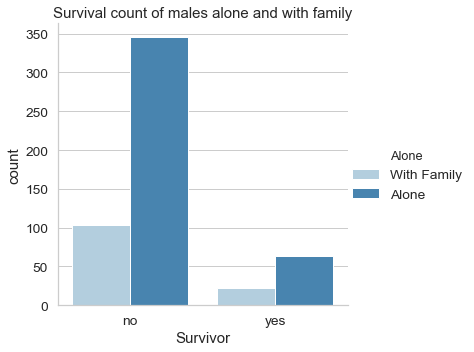

In [64]:
#Let's look at the numbers of survivors.
sns.catplot(x='Survivor',data=titanic_df[titanic_df['Person'] =='male'],kind='count',palette='Blues',hue='Alone')
plt.title('Survival count of males alone and with family')

In [62]:
# Count men traveling with family who did not survive.
mwf_ns = titanic_df[(titanic_df['Survived']==0) & (titanic_df['Alone'] == 'With Family') & (titanic_df['Person'] == 'male')].PassengerId.count()
# Count men traveling with family who did survive.
mwf_s = titanic_df[(titanic_df['Survived']==1) & (titanic_df['Alone'] == 'With Family') & (titanic_df['Person'] == 'male')].PassengerId.count()
# Count men traveling alone who did not survive.
ma_ns = titanic_df[(titanic_df['Survived']==0) & (titanic_df['Alone'] == 'Alone') & (titanic_df['Person'] == 'male')].PassengerId.count()
# Count men traveling alone who did survive.
ma_s = titanic_df[(titanic_df['Survived']==1) & (titanic_df['Alone'] == 'Alone') & (titanic_df['Person'] == 'male')].PassengerId.count()

# Print the contingency table
[[mwf_s,ma_s],[mwf_ns,ma_ns]]

[[22, 64], [104, 346]]

In [63]:
# Perform a chi-squared test on the four contingency values
stats.chi2_contingency([[mwf_s,ma_s],[mwf_ns,ma_ns]])

(0.1269042887254271,
 0.7216636226043143,
 1,
 array([[ 20.21641791,  65.78358209],
        [105.78358209, 344.21641791]]))

<p>The chi-squared statistic for this contingency table is 0.127. The p statistic of 0.721 indicates that the null hypothesis (that males with family have an equal chance of survival as females alone) cannot be rejected. Therefore, traveling with family did not change a male's survival rate.</p>

<p>The chi-squared statistic of all passengers indicated that traveling with family has an impact on survival rate. However, traveling with family has no impact for men nor women when examined separately. The reason for the significant difference overall can be explained by the fact that a higher percentage of male travelers travel alone and male travelers had a much lower survival rate than females.</p>

<h1>Summary</h1>

<p>There are 891 passengers in this partial list of passengers on the Titanic. There are almost twice as many males as females. In first and second class, males and females are almost evenly distributed. However, in third class males outnumber females by a ratio of 2.5:1. Children,identified either by their age or their name title, were more numerous in third class than the other two classes by a ratio of 3:1. Only a fourth of the passengers have an identified cabin, almost all of whom are first class passengers.</p>

<p>The two most important contributors to surviving the Titanic disaster are not being male and not being in third class. Males had a survival rate of less than 20%, whereas females and children were more than three times as likely to survive. Survival rate decreased from a maximum of 60% for first class down to 25% for third class. Age, deck level, and traveling alone did not contribute significantly to survival rate. The survival rate of children has some uncertainty because a sample equal to 20% of the total number of children could not be identified as children or adults.</p>